# Práctico 5
1. Entrena y ajusta un árbol de decisión para el conjunto de datos moons siguiendo estos pasos:
  - Usa make_moons(n_samples=10000, noise=0.4) para generar el conjunto de datos moons.
  - Usa train_test_split() para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
  - Usa la búsqueda en cuadrícula con validación cruzada (con la ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. Consejo: prueba varios valores para max_leaf_nodes.
  - Entrena el modelo en el conjunto de entrenamiento completo utilizando estos hiperparámetros y mide su rendimiento en el conjunto de prueba. Deberías obtener una precisión aproximada del 85% al 87%.

In [8]:
# Importamos libreria de make moons.
#  Esta función genera un conjunto de datos sintéticos que consiste en dos grupos de 
# puntos en forma de luna creciente, y se utiliza ampliamente como un conjunto de datos
# de prueba para la clasificación binaria. El parámetro n_samples indica el número total 
# de puntos de datos a generar, mientras que el parámetro noise controla el nivel de
# ruido en los datos generados.

from sklearn.datasets import make_moons

#Generamos conjunto de datos moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [9]:
# Dividimos conjunto de datos en test y train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Definimos los parámetros a buscar mediante GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}

In [11]:
# Definimos el modelo que vamos a utilizar

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

In [12]:
# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'max_leaf_nodes': 33, 'min_samples_split': 2}


In [13]:
# Entrenamos el modelo con los mejores hiperparámetros encontrados en todo el conjunto de entrenamiento
# Max leaf nodes = 33, Min samples split = 2

tree_clf_best = DecisionTreeClassifier(max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],   
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        random_state=42)
tree_clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=33, random_state=42)

In [14]:
# Medimps la precisión del modelo en el conjunto de prueba, la accuracy

accuracy = tree_clf_best.score(X_test, y_test)
print(f"La precisión del modelo en el conjunto de prueba es {accuracy:.2%}.")

# Vemos que el resultado da entre 85% y 87%

La precisión del modelo en el conjunto de prueba es 86.32%.



  
1. Cargar el dataset de iris. Tomando solamente las variables de largo y ancho del pétalo, entrenar los distintos modelos de Clasificación que se vieron en clase y comparar los bordes generadas para cada una de las Clases.
Modelos:
  - Regresión Softmax
  - Clasificador Estocástico (utilice 10000 iteraciones)
  - SVM lineal
  - SVM con kernel (pruebe diferentes kernels)
  - Naive Bayes
  - Decision Tree (utilice una profundidad máxima de 2)
  - KNeighbors (varie el número de vecinos a 3)

In [15]:
# Cargamos el dataset de iris

from sklearn.datasets  import load_iris
import pandas as pd

X,y = load_iris(return_X_y = True, as_frame=True)   #De esta manera cargo mejor los datos para no tener problemas con y 


In [16]:
# Tomamos solo las variables del largo y ancho del petalo

X = X.drop(['sepal length (cm)','sepal width (cm)'], axis=1).values #sin el values hay problemas porque los datos de X son dataframe y los de y son array

# Graficamos X e y
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [17]:
# Dividir el conjunto de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# Definir los modelos a utilizar
models = [
    LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial', solver="lbfgs"),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=2, random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    LinearSVC(random_state=42, max_iter=10000),
    SVC(kernel='linear', C=1),
    SVC(kernel='rbf', gamma=0.1, C=1),
    SVC(kernel='poly', degree=3, C=1)
]


In [19]:
### funcion para graficar 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_iris_plot(clasifier):
  x0, x1 = np.meshgrid(
          np.linspace(0, 8, 500).reshape(-1, 1),
          np.linspace(0, 3.5, 200).reshape(-1, 1),
      )

  X_new = np.c_[x0.ravel(), x1.ravel()]

  y_predict = clasifier.predict(X_new)

  zz = y_predict.reshape(x0.shape)

  plt.figure(figsize=(10, 4))
  plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
  plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
  plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.legend(loc="center left", fontsize=14)
  plt.axis([0, 8, 0, 3.5])

  plt.show()

LogisticRegression: Precisión en el conjunto de prueba = 100.00%


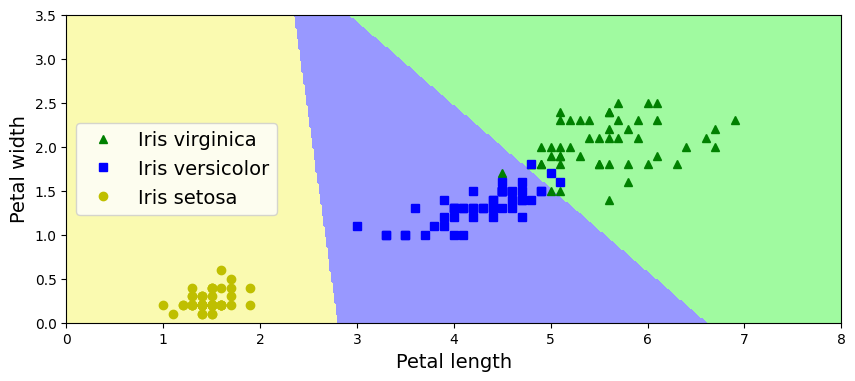

GaussianNB: Precisión en el conjunto de prueba = 100.00%


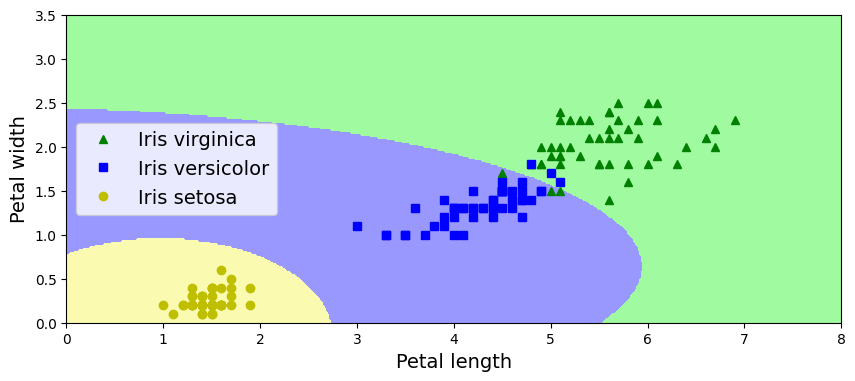

DecisionTreeClassifier: Precisión en el conjunto de prueba = 96.67%


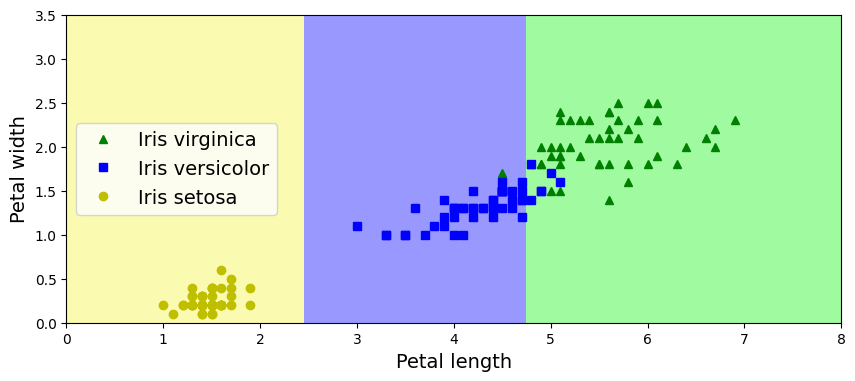

KNeighborsClassifier: Precisión en el conjunto de prueba = 100.00%


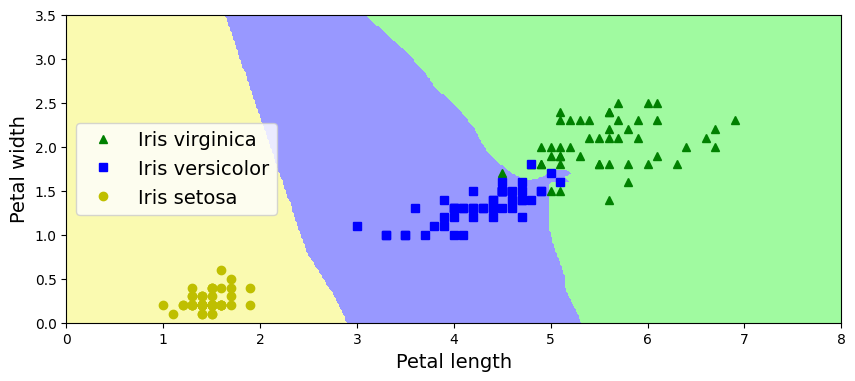

LinearSVC: Precisión en el conjunto de prueba = 96.67%


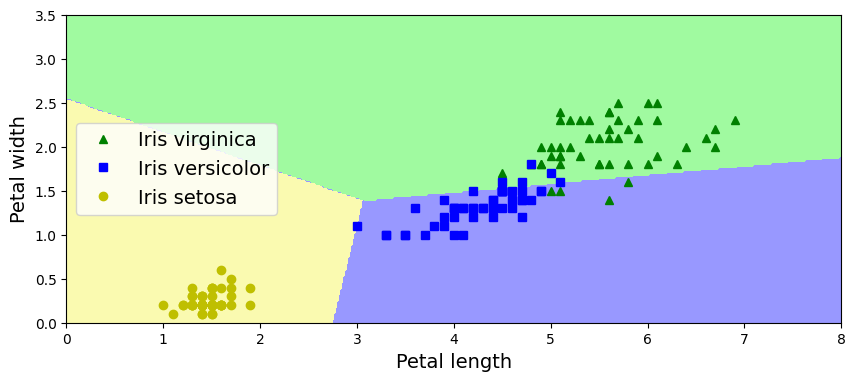

SVC: Precisión en el conjunto de prueba = 100.00%


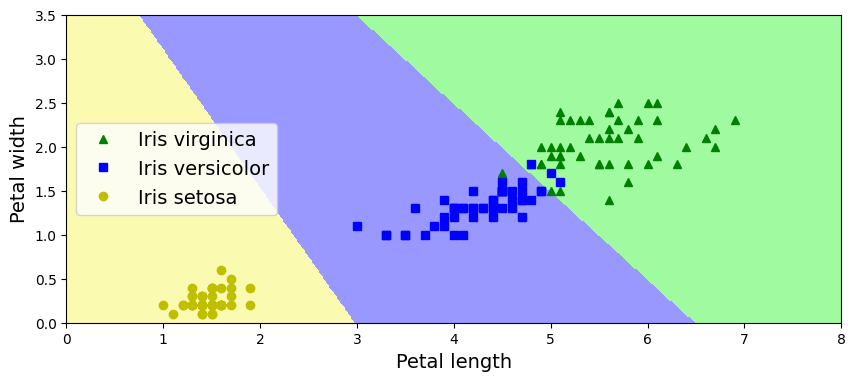

SVC: Precisión en el conjunto de prueba = 100.00%


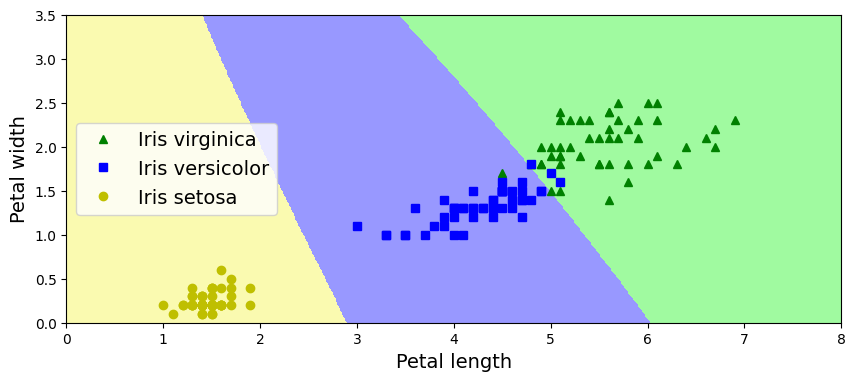

SVC: Precisión en el conjunto de prueba = 100.00%


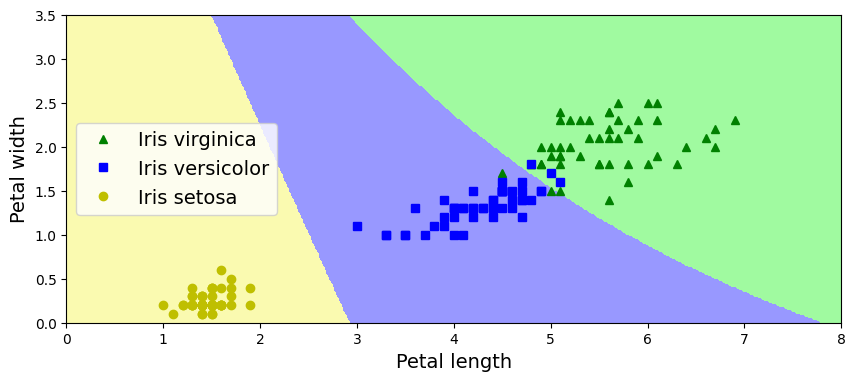

In [20]:
# Entreno y evaluo cada modelo, es mas rapido con un for. Tambien grafico cada uno.

for model in models:
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Evaluar el modelo en el conjunto de prueba
    accuracy = model.score(X_test, y_test)
    print(f"{type(model).__name__}: Precisión en el conjunto de prueba = {accuracy:.2%}")
    
    # Aplico la funcion de graficar
    
    generate_iris_plot(model)
    


2. Construya un modelo de ensamble de votación con los modelos anteriores.


In [21]:
from sklearn.ensemble import VotingClassifier

# Definir el modelo de ensamble de votación usando todos los modelos anteriores

voting_clf = VotingClassifier(
    estimators=[('lr', models[0]), ('gnb', models[1]), ('dt', models[2]), 
                ('knn', models[3]), ('lsvc', models[4]), ('svc1', models[5]), 
                ('svc2', models[6]), ('svc3', models[7])],
    voting='hard'
)

In [22]:
# Entrenamos con fit

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('gnb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('lsvc',
                              LinearSVC(max_iter=10000, random_state=42)),
                             ('svc1', SVC(C=1, kernel='linear')),
                             ('svc2', SVC(C=1, gamma=0.1)),
                             ('svc3', SVC(C=1, kernel='poly'))])

In [23]:
# Evaluar el modelo de ensamble de votación en el conjunto de prueba

from sklearn.metrics import accuracy_score

for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
GaussianNB 1.0
DecisionTreeClassifier 0.9666666666666667
KNeighborsClassifier 1.0
LinearSVC 0.9666666666666667
SVC 1.0
SVC 1.0
SVC 1.0


3. Cree una muestra unidimensional con *y* dependiendo cuadraticamente de *x*, entrenar los distintos modelos de regresión que se vieron en clase y comparar las aproximaciones graficandolas. ¿En caso de querer extrapolar, que modelos no parecen ser una buena elección?
Modelos:
  - Regresión Lineal
  - Regresión Polinomica
  - Regresión Lineal Estocástica
  - SVM lineal
  - SVM con kernel
  - Decision Tree
  - KNeighbors


In [24]:
import numpy as np

def quadratic_function(x):
    return x**2 + np.random.normal(scale=5, size=len(x))


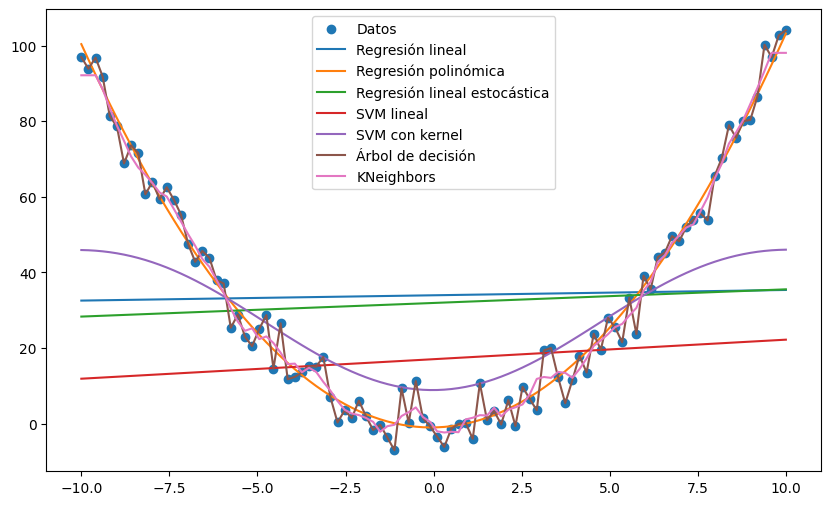

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Crear muestra de datos
x = np.linspace(-10, 10, num=100)
y = quadratic_function(x)

# Entrenar modelos
lr = LinearRegression().fit(x.reshape(-1, 1), y)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))
poly_reg = LinearRegression().fit(x_poly, y)
sgd = SGDRegressor().fit(x.reshape(-1, 1), y)
lin_svr = LinearSVR().fit(x.reshape(-1, 1), y)
rbf_svr = SVR(kernel='rbf').fit(x.reshape(-1, 1), y)
tree_reg = DecisionTreeRegressor().fit(x.reshape(-1, 1), y)
knn_reg = KNeighborsRegressor().fit(x.reshape(-1, 1), y)

# Evaluar modelos en los datos de entrenamiento
y_lr = lr.predict(x.reshape(-1, 1))
y_poly = poly_reg.predict(x_poly)
y_sgd = sgd.predict(x.reshape(-1, 1))
y_lin_svr = lin_svr.predict(x.reshape(-1, 1))
y_rbf_svr = rbf_svr.predict(x.reshape(-1, 1))
y_tree = tree_reg.predict(x.reshape(-1, 1))
y_knn = knn_reg.predict(x.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos')
plt.plot(x, y_lr, label='Regresión lineal')
plt.plot(x, y_poly, label='Regresión polinómica')
plt.plot(x, y_sgd, label='Regresión lineal estocástica')
plt.plot(x, y_lin_svr, label='SVM lineal')
plt.plot(x, y_rbf_svr, label='SVM con kernel')
plt.plot(x, y_tree, label='Árbol de decisión')
plt.plot(x, y_knn, label='KNeighbors')
plt.legend(loc='best')
plt.show()


4. Al igual que con los clasificadores, contruya un modelo de ensamble de votación, pero esta vez de regresión.  

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Definir los modelos de regresión
lr = LinearRegression()
lr_poly = LinearRegression()
lr_stochastic = SGDRegressor(max_iter=1000, tol=1e-3)
knn = KNeighborsRegressor(n_neighbors=10)
dt = DecisionTreeRegressor(max_depth=3)
svr_lin = SVR(kernel='linear', C=1e3)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Definir el modelo de ensamble de votación usando todos los modelos anteriores
voting_reg = VotingRegressor(
    estimators=[('lr', lr), ('lr_poly', lr_poly), 
                ('lr_stochastic', lr_stochastic), ('knn', knn), 
                ('dt', dt), ('svr_lin', svr_lin), ('svr_rbf', svr_rbf)]
)

# Entrenar los modelos y calcular su MSE en el conjunto de prueba
models = [lr, lr_poly, lr_stochastic, knn, dt, svr_lin, svr_rbf, voting_reg]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, mean_squared_error(y_test, y_pred))


LinearRegression 0.035129549615030835
LinearRegression 0.035129549615030835
SGDRegressor 0.06471232342252178
KNeighborsRegressor 0.005666666666666669
DecisionTreeRegressor 0.00863265306122449
SVR 0.034181775445889316
SVR 0.017469583880163366
VotingRegressor 0.01798605334684385


# Preguntas teoricas
### Regresión
1. ¿Qué algoritmo de entrenamiento de Regresión Lineal puedes usar si tienes un conjunto de entrenamiento con millones de características?
2. Supongamos que las características en tu conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir por esto y cómo? ¿Qué puedes hacer al respecto?
3. ¿Puede el Descenso de Gradiente quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística?
4. ¿Todos los algoritmos de Descenso de Gradiente conducen al mismo modelo, siempre y cuando los dejes correr el tiempo suficiente?
5. Supongamos que usas Descenso de Gradiente por lotes y graficas el error de validación en cada época. Si notas que el error de validación consistentemente aumenta, ¿qué es lo que probablemente está sucediendo? ¿Cómo puedes solucionarlo?
6. ¿Es una buena idea detener inmediatamente el Descenso de Gradiente por mini-lotes cuando el error de validación aumenta?
7. ¿Qué algoritmo de Descenso de Gradiente (entre los que discutimos) llegará más rápido a la cercanía de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?
8. Supongamos que estás utilizando Regresión Polinómica. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el error de validación. ¿Qué está sucediendo? ¿Cuáles son tres formas de solucionarlo?
9. Supongamos que estás utilizando Regresión Ridge y notas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Dirías que el modelo sufre de sesgo alto o de varianza alta? ¿Deberías aumentar el hiperparámetro de regularización α o reducirlo?
10. ¿Por qué querrías usar:
  - Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin regularización)?
  - Lasso en lugar de Regresión Ridge?
  - Elastic Net en lugar de Lasso?
11. Supongamos que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de Regresión Logística o uno de Regresión Softmax?
### SVM
1. ¿Cuál es la idea fundamental detrás de las Máquinas de Vectores de Soporte?
2. ¿Qué es un vector de soporte?
3. ¿Por qué es importante escalar las entradas al usar SVM?
4. ¿Puede un clasificador SVM producir un puntaje de confianza al clasificar una instancia? ¿Y una probabilidad?
5. ¿Deberías usar la forma primal o dual del problema SVM para entrenar un modelo en un conjunto de entrenamiento con millones de instancias y cientos de características?
6. Digamos que has entrenado un clasificador SVM con un kernel RBF, pero parece subajustarse al conjunto de entrenamiento. ¿Deberías aumentar o disminuir γ (gamma)? ¿Y C?
### Árboles de decisiones
1. ¿Cuál es la profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias?
2. ¿La impureza de Gini de un nodo es generalmente menor o mayor que la de su padre? ¿Es generalmente menor/mayor o siempre menor/mayor?
3. Si un árbol de decisión está sobreajustando el conjunto de entrenamiento, ¿es buena idea intentar disminuir max_depth?
4. Si un árbol de decisión está subajustando el conjunto de entrenamiento, ¿es buena idea intentar escalar las características de entrada?
5. Si tarda una hora en entrenar un árbol de decisión en un conjunto de entrenamiento que contiene 1 millón de instancias, ¿cuánto tiempo aproximado tomará entrenar otro árbol de decisión en un conjunto de entrenamiento que contiene 10 millones de instancias?
6. Si su conjunto de entrenamiento contiene 100,000 instancias, ¿establecer presort=True acelerará el entrenamiento?